# Pendahuluan

Dalam tugas kali ini, Anda diminta untuk melakukan EDA pada [dataset "Housing Price"](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) menggunakan teknik visualisasi 1D dan 2D. Dataset "Housing Price" berisi berbagai informasi mengenai properti-properti yang dijual, misalnya zona lokasi, jumlah kamar tidur, ukuran tanah, dll.

# Data Preparation

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Import data -- Silakan di-import berdasarkan direktori masing-masing
house = pd.read_csv("train_house.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
house.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [7]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
# Drop variabel NaN
house = house.dropna(axis=1)

In [13]:
# Memisahkan data menjadi numerikal & kategorikal
numerical_data = house.select_dtypes(include=['int64', 'float64'])
categorical_data = house.select_dtypes(include=['object'])

#Menyajikan struktur dari dataset yang sudah dibersihkan dan data yang sudah dipisahkan
numerical_data.shape, categorical_data.shape

((1460, 35), (1460, 27))

# 1D Visualization 

## Soal 1

1. Buatlah visualisasi barplot dan analisis untuk variabel kategorikal:
    * `Utilities`
    * `HouseStyle`
    * `ExterQual` 

2. Buatlah visualisasi histogram dan analisis untuk variabel numerikal:
    * `SalePrice`
    * `GrLivArea`
    * `PoolArea`

3. Terapkan pemrosesan data yang sesuai untuk masing-masing variabel dan tulis penjelasan serta analisisnya!

## Variabel Kategorikal

### Utilities

* `Utilities` berisi informasi mengenai fasilitas apa saja yang tersedia di properti tersebut
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSeWa	Electricity and Gas Only	

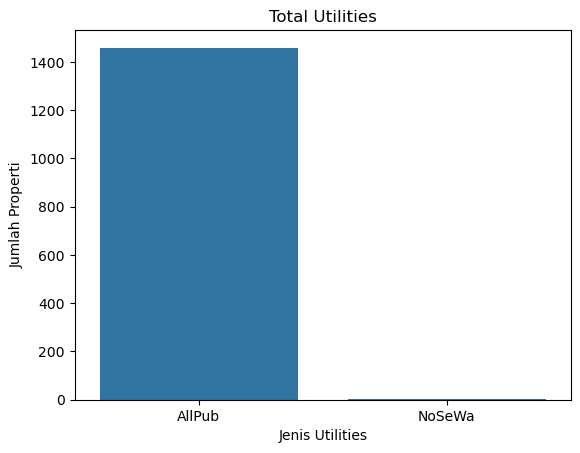

In [15]:
#Visualisasi Variabel Kategorikal Utilities
plt.figure
sns.countplot(data=categorical_data, x='Utilities')
plt.title('Total Utilities')
plt.xlabel('Jenis Utilities')
plt.ylabel('Jumlah Properti')
plt.show()

### HouseStyle

HouseStyle: Style properti (misal: 1 lantai, 2 lantai, dst)
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

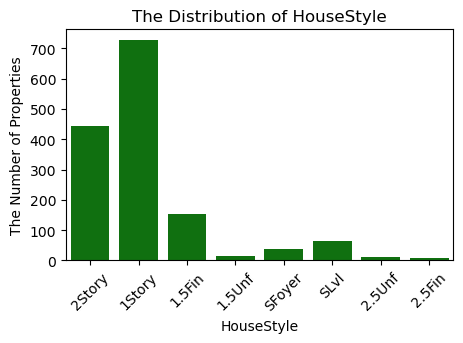

In [17]:
#Visualisasi Variabel Kategorikal HouseStyle
plt.figure(figsize=(5,3))
sns.countplot(x='HouseStyle', data=house, color ='green')
plt.title('The Distribution of HouseStyle')
plt.xlabel('HouseStyle')
plt.ylabel('The Number of Properties')
plt.xticks(rotation=45)
plt.show()

### ExterQual

ExterQual: Kualitas material eksterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair

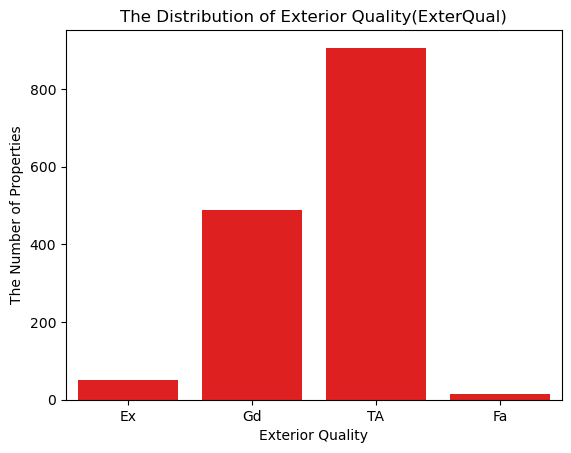

In [19]:
#Visualisasi Variabel Kategorikal ExterQual
plt.figure
sns.countplot(x='ExterQual', data = house, order=['Ex', 'Gd', 'TA', 'Fa'], color = 'red')
plt. title('The Distribution of Exterior Quality(ExterQual)')
plt.xlabel('Exterior Quality')
plt.ylabel('The Number of Properties')
plt.show()

#### **Analisis tentang variabel kategorikal**

* Berdasarkan hasil grafik visualsasi, didapatkan hasil bahwa fasilitas properti yang diinginkan oleh pembeli (Utilities) adalah All Facilities Public(AllPub), style properti (HouseStyle) yang terpopuler adalah style 1story dan 2story, apabila dibandingkan dengan style properti lainnya, sedangkan untuk kualitas material eksterior (ExterQual) yang terjual didominasi oleh kualitas Average/Typical (TA)

## Variabel Numerikal

### SalePrice

* SalePrice merupakan variabel target yang ingin diprediksi
* Secara fisik, ini berarti harga properti yang dijual

Mean : 180921.19589041095
Median : 163000.0
Standard Deviation : 79442.50288288663


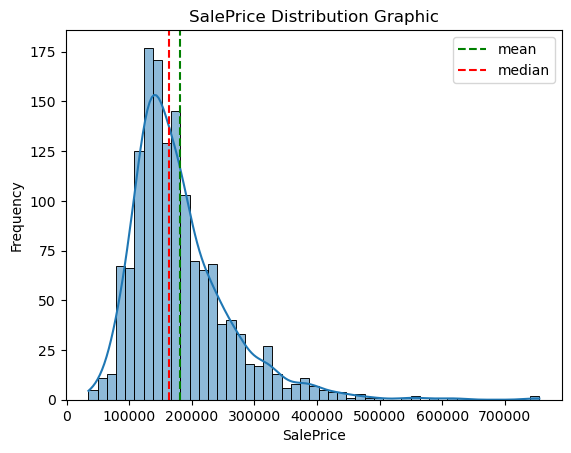

In [21]:
# Menghitung Mean, Median, Std Dev, serta Grafik Distribusi SalePrice
x = house['SalePrice']
sns.histplot(x, kde = True)
line1 = plt.axvline(x.mean(), color = 'g', linestyle = '--', label = 'mean')
line2 = plt.axvline(x.median(), color = 'r', linestyle = '--', label = 'median')
first_legend = plt.legend(handles=[line1,line2], loc=1)
print('Mean :', x.mean())
print('Median :', x.median())
print('Standard Deviation :', x.std())
plt.title('SalePrice Distribution Graphic')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

#### **Analisis tentang variabel `SalePrice`**

* Grafik Histogram SalePrice bersifat right skewed, dimana nilai Mean lebih besar dibandingkan nilai Median, hal ini mengindikasikan bahwa banyak rumah yang dijual dengan harga yang lebih rendah dibandingkan dengan banyak rumah yang dijual dengan harga yang lebih tinggi
* Harga rumah yang dijual lebih banyak di rentang angka 100.000 sampai 200.000
* Data perlu dilakukan transformasi, sehingga data terdisbustri secara normal

### GrLivArea

* GrLivArea berisi informasi mengenai luas area tinggal di atas permukaan tanah (tidak termasuk basement)
* Satuan yang digunakan adalah *square feet*

Mean : 1515.463698630137
Median : 1464.0
Standard Deviation : 525.4803834232027


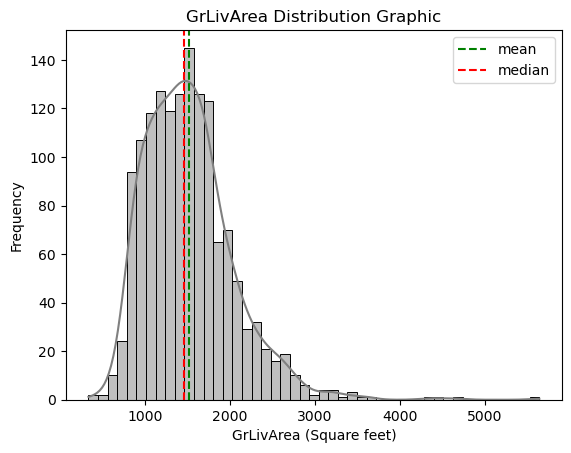

In [23]:
# Menghitung Mean, Median, Std Dev, serta Grafik Distribusi GRivArea
x = house['GrLivArea']
sns.histplot(x, kde = True, color = 'grey')
line1 = plt.axvline(x.mean(), color = 'g', linestyle = '--', label = 'mean')
line2 = plt.axvline(x.median(), color = 'r', linestyle = '--', label = 'median')
first_legend = plt.legend(handles=[line1,line2], loc=1)
print('Mean :', x.mean())
print('Median :', x.median())
print('Standard Deviation :', x.std())
plt.title('GrLivArea Distribution Graphic')
plt.xlabel('GrLivArea (Square feet)')
plt.ylabel('Frequency')
plt.show()

#### **Analisis tentang variabel `GrlivArea`**

* Grafik Histogram GrLivArea bersifat right skewed, dimana nilai Mean lebih besar  dibandingkan nilai Median, hal ini mengindikasikan bahwa banyak rumah yang dijual dengan harga yang lebih rendah dibandingkan dengan banyak rumah yang dijual dengan harga yang lebih tinggi
* Luas Area Properti dengan jumlah terbanyak berada pada rentang 1000 Squarefeet sampai 2000 Squarefeet
* Data GrLivArea akan rentan outlier diakibatkan rentang luas terlalu lebar antara 0 sampai diatas 5000

### GarageArea

* GarageArea berisi informasi mengenai luas garasi (jika ada)
* Satuan yang digunakan adalah *square feet*

Mean : 472.9801369863014
Median : 480.0
Standard Deviation : 213.80484145338076


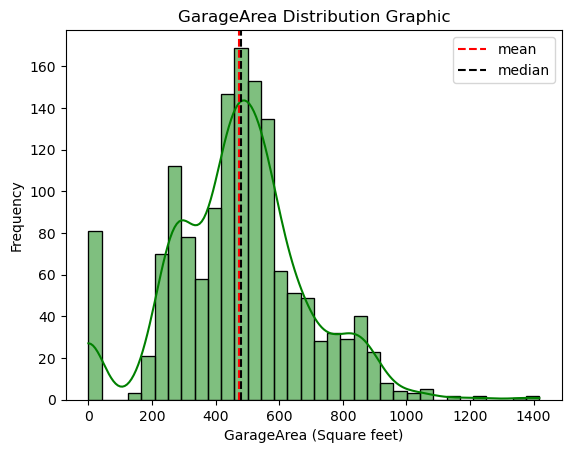

In [25]:
# Menghitung Mean, Median, Std Dev, serta Grafik Distribusi GarageArea
x = house['GarageArea']
sns.histplot(x, kde = True, color = 'green')
line1 = plt.axvline(x.mean(), color = 'r', linestyle = '--', label = 'mean')
line2 = plt.axvline(x.median(), color = 'k', linestyle = '--', label = 'median')
first_legend = plt.legend(handles=[line1,line2], loc=1)
print('Mean :', x.mean())
print('Median :', x.median())
print('Standard Deviation :', x.std())
plt.title('GarageArea Distribution Graphic')
plt.xlabel('GarageArea (Square feet)')
plt.ylabel('Frequency')
plt.show()

#### **Analisis tentang variabel `GarageArea`**

* Data sangat tidak stabil.
* Terdapat nilai 0 yang lumayan banyak. Hal ini bisa saja terjadi karena tidak semua properti memiliki garasi.
* Untuk membuat distribusi data menjadi lebih normal, bisa dengan mengabaikan faktor rumah tanpa garasi. Dengan kata lain, hanya memperhitungkan rumah dengan garasi.
* Variasi luas garasi terlalu banyak. Bisa saja ukuran garasi disesuaikan dengan fungsinya. Mungkin ada yang digunakan hanya untuk menyimpan kendaraan. Mungkin juga bisa dipakai sebagai workshop atau hanya digunakan untuk menyimpan barang tidak terpakai.

Mean (filtered) : 500.76214648295866
Median (filtered) : 484.0
Standard Deviation (filtered) : 185.68051979433156


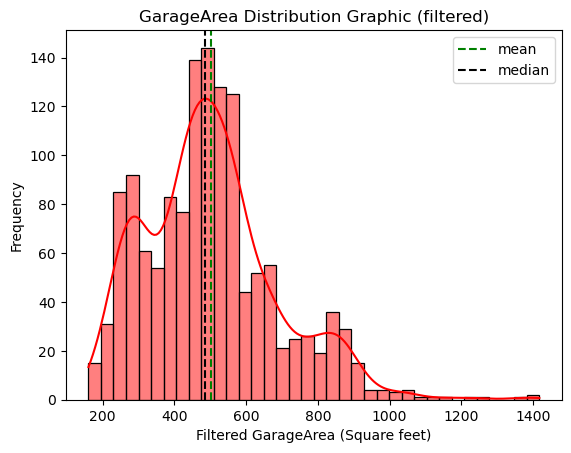

In [27]:
# Menghilangkan nilai nol pada GarageArea
GarageFiltered = house[house['GarageArea'] > 0]

x = GarageFiltered['GarageArea']
sns.histplot(x, kde = True, color = 'red')
line1 = plt.axvline(x.mean(), color = 'g', linestyle = '--', label = 'mean')
line2 = plt.axvline(x.median(), color = 'k', linestyle = '--', label = 'median')
first_legend = plt.legend(handles=[line1,line2], loc=1)
print('Mean (filtered) :', x.mean())
print('Median (filtered) :', x.median())
print('Standard Deviation (filtered) :', x.std())
plt.title('GarageArea Distribution Graphic (filtered)')
plt.xlabel('Filtered GarageArea (Square feet)')
plt.ylabel('Frequency')
plt.show()

## Pemrosesan Data Variabel Numerikal

Mean : 5.221978956475628
Median : 5.212187604403958
Standard Deviation : 0.17347974217176843


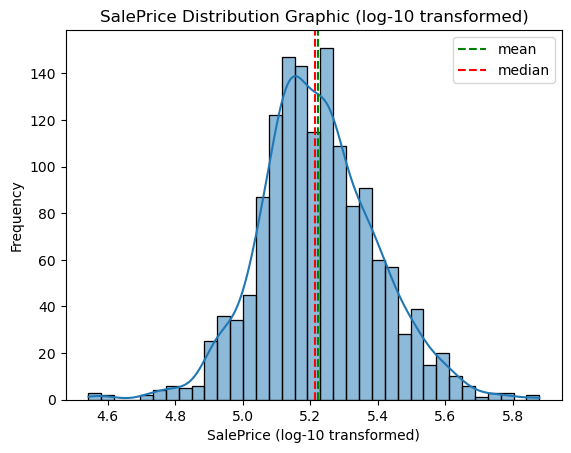

In [29]:
# Transformasi log-10 SalePrice

x = np.log10(house['SalePrice'])
sns.histplot(x, kde = True)
line1 = plt.axvline(x.mean(), color = 'g', linestyle = '--', label = 'mean')
line2 = plt.axvline(x.median(), color = 'r', linestyle = '--', label = 'median')
first_legend = plt.legend(handles=[line1,line2], loc=1)
print('Mean :', x.mean())
print('Median :', x.median())
print('Standard Deviation :', x.std())
plt.title('SalePrice Distribution Graphic (log-10 transformed)')
plt.xlabel('SalePrice (log-10 transformed)')
plt.ylabel('Frequency')
plt.show()

Mean : 3.156354310389778
Median : 3.165541076722373
Standard Deviation : 0.14485910869663873


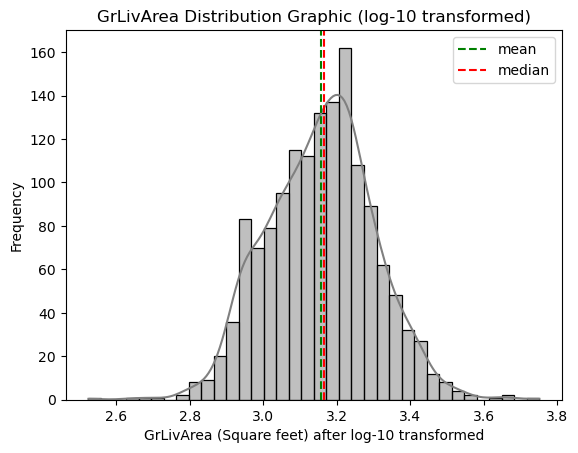

In [31]:
# Transformasi log-10 GrLivArea

x = np.log10(house['GrLivArea'])
sns.histplot(x, kde = True, color = 'grey')
line1 = plt.axvline(x.mean(), color = 'g', linestyle = '--', label = 'mean')
line2 = plt.axvline(x.median(), color = 'r', linestyle = '--', label = 'median')
first_legend = plt.legend(handles=[line1,line2], loc=1)
print('Mean :', x.mean())
print('Median :', x.median())
print('Standard Deviation :', x.std())
plt.title('GrLivArea Distribution Graphic (log-10 transformed)')
plt.xlabel('GrLivArea (Square feet) after log-10 transformed')
plt.ylabel('Frequency')
plt.show()

Mean : 2.6696154158200915
Median : 2.6848453616444123
Standard Deviation : 0.16427840573730204


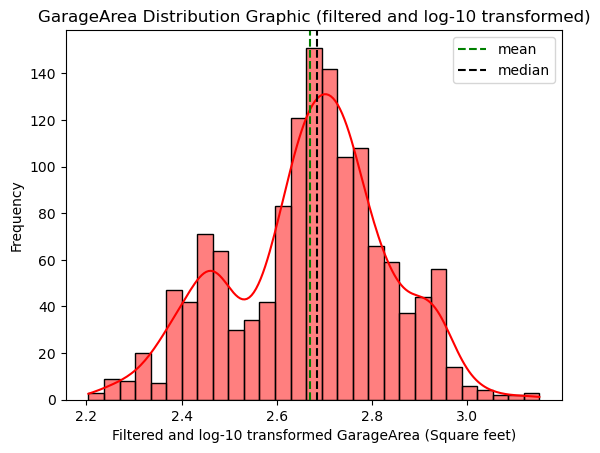

In [174]:
# Transformasi log-10 GarageArea

x = np.log10(house['GarageArea'][house['GarageArea'] > 0])
sns.histplot(x, kde = True, color = 'red')
line1 = plt.axvline(x.mean(), color = 'g', linestyle = '--', label = 'mean')
line2 = plt.axvline(x.median(), color = 'k', linestyle = '--', label = 'median')
first_legend = plt.legend(handles=[line1,line2], loc=1)
print('Mean :', x.mean())
print('Median :', x.median())
print('Standard Deviation :', x.std())
plt.title('GarageArea Distribution Graphic (filtered and log-10 transformed)')
plt.xlabel('Filtered and log-10 transformed GarageArea (Square feet)')
plt.ylabel('Frequency')
plt.show()

#### **Penjelasan dan analisis tentang pemrosesan data**

* Setelah dilakukan transformasi log-10, distribusi data SalePrice, GrLivArea, dan GarageArea menjadi distribusi normal.
* Nilai 0 pada GarageArea tidak dimasukkan dalam perhitungan.

# 2D Visualization

## Soal 2

1. Buat visualisasi tentang hubungan antara:
    * `GrLivArea` dengan `SalePrice`
    * `GarageArea` dengan `SalePrice`

2. Buat hipotesis Anda tentang hubungan antar-variabel

# `GrLivArea` dengan `SalePrice`

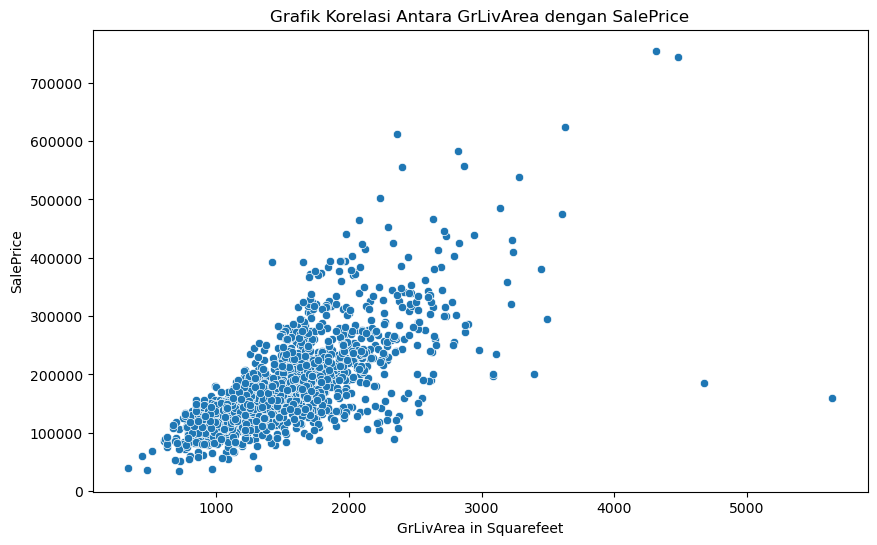

In [33]:
#Visualisasi hubungan SalePrice dan GrLivArea
plt.figure(figsize=(10,6))
sns.scatterplot(y = 'SalePrice', x = 'GrLivArea', data = house)
plt.title('Grafik Korelasi Antara GrLivArea dengan SalePrice')
plt.xlabel('GrLivArea in Squarefeet')
plt.ylabel('SalePrice')
plt.show()

# `GarageArea` dengan `SalePrice`

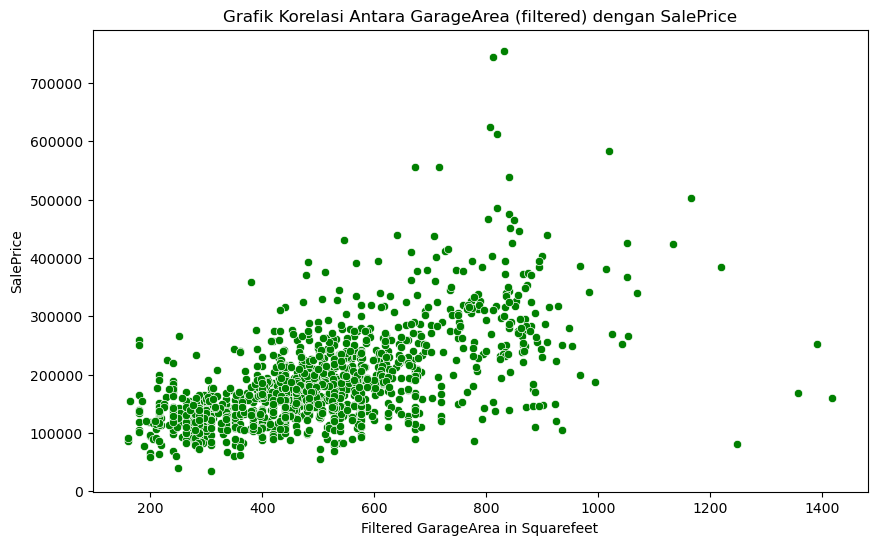

In [35]:
#Visualisasi hubungan GarageArea dan SalePrice
plt.figure(figsize=(10,6))
sns.scatterplot(y = 'SalePrice', x = 'GarageArea', data = GarageFiltered, color = 'green')
plt.title('Grafik Korelasi Antara GarageArea (filtered) dengan SalePrice')
plt.xlabel('Filtered GarageArea in Squarefeet')
plt.ylabel('SalePrice')
plt.show()

In [37]:
correlation_matrix = GarageFiltered[['SalePrice', 'GrLivArea', 'GarageArea']].corr()
print(correlation_matrix)

            SalePrice  GrLivArea  GarageArea
SalePrice    1.000000   0.708172    0.608405
GrLivArea    0.708172   1.000000    0.478811
GarageArea   0.608405   0.478811    1.000000


#### **Hipotesis tentang hubungan antar-varibel**

**Korelasi antara GrlivArea dengan SalePrice**

* Nilai Korelasi : 0.708172
* Berarti disimpulkan bahwa terdapat hubungan positif antara luas area yang dapat dihuni (GrLivArea) dengan harga jual rumah (SalePrice). Semakin luas area yang bisa dihuni, semakin tinggi juga harga jual suatu rumah.

**Korelasi antara GarageArea dengan SalePrice**

* Nilai Korelasi : 0.608405
* Berarti disimpulkan bahwa terdapat hubungan positif antara luas area garasi (GarageArea) dengan harga jual rumah (SalePrice). Semakin luas area garasi, semakin tinggi juga harga jual suatu rumah.
* Secara keseluruhan, kedua variabel (GrLivArea & GarageArea) memiliki korelasi yang cukup kuat dengan SalePrice, dengan variabel GrLivArea memiliki pengaruh yang lebih besar dibandingkan variabel GarageArea.